# Figure notebook

Author: _Pim Dankloff_

Dependencies:

In [1]:
# standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection._mutual_info import mutual_info_regression
from scipy.optimize import root_scalar, minimize

# custom anlysis scripts
from analysis.models import szyszkowski_model, dynamic_st_model
from analysis.utils import fit_model, calculate_st_at_cmc, calculate_C20, calculate_gamma_max
from utils.data_processing import smooth
# from analysis.mixtures.interaction_parameter import *

C:\Users\pimda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


import data & fit model

In [2]:
exp_tag, solution = ("AULAB_PSP0076/part_4", "SDS_2_1")
df = pd.read_csv(f"data/experiments/{exp_tag}/results.csv")
df = df[df["solution"] == solution]

c = df["concentration"] / 1000
st = df["surface tension eq. (mN/m)"] / 1000

obs = (c, st)
parameters = ["cmc", "gamma_max", "Kad"]

# fit isotherm model
post_pred, x_new = fit_model(
    obs, model=szyszkowski_model, parameters=parameters, outlier_check=False
)

# mean and std of posterior predictive distribution
st_fit_mu = post_pred["obs"].mean(axis=0)


sample: 100%|██████████| 1500/1500 [00:04<00:00, 327.28it/s, 39 steps of size 5.96e-02. acc. prob=0.94]  



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
        Kad    190.53     16.55    190.69    162.42    217.08    211.75      1.01
        cmc      0.01      0.00      0.01      0.01      0.01    427.87      1.00
  gamma_max      0.00      0.00      0.00      0.00      0.00    191.50      1.01
      sigma      0.00      0.00      0.00      0.00      0.00    435.32      1.00

Number of divergences: 0


gamma_max: 4.54915189925457e-06 at conc: 0.007242404390126467 M


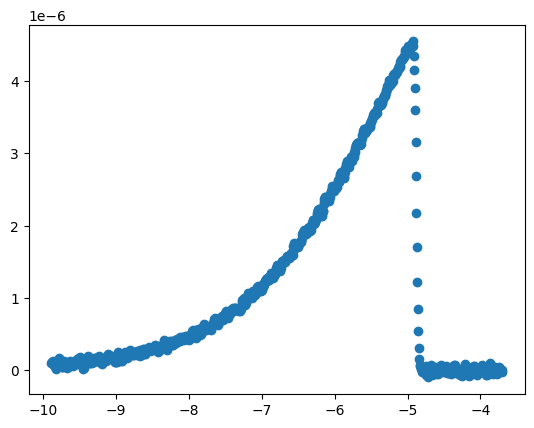

In [23]:
gamma_max, avg_xs, gammas = calculate_gamma_max(x_new=x_new, post_pred=post_pred, n=2, interval=10)
idx = np.argmax(gammas)
avg_log_x_max = avg_xs[idx]
avg_x_max = np.exp(avg_log_x_max)
print(f"gamma_max: {gamma_max} at conc: {avg_x_max} M")
plt.scatter(avg_xs, gammas)